<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix, precision_score, roc_auc_score, roc_curve
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Churn.csv')

## Исследование задачи

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


RowNumber — индекс строки в данных \
CustomerId — уникальный идентификатор клиента \
Surname — фамилия \
CreditScore — кредитный рейтинг \
Geography — страна проживания \
Gender — пол \
Age — возраст \
Tenure — сколько лет человек является клиентом банка \
Balance — баланс на счёте \
NumOfProducts — количество продуктов банка, используемых клиентом \
HasCrCard — наличие кредитной карты \
IsActiveMember — активность клиента \
EstimatedSalary — предполагаемая зарплата 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.duplicated().sum()

0

In [7]:
a = df['Tenure'].median()
a

5.0

In [8]:
df['Tenure'].mean()

4.997690023099769

In [9]:
df['Tenure'] = df['Tenure'].fillna(a)

Так как медиана является более устойчивым показателем к выбросам в данных. В нашем случае медиана (=5) практически равна среднему значению (=4.997690023099769). Поэтому можем предположить, что данные имеют нормальное распределение.  

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [11]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
dfp = df.drop(['RowNumber','CustomerId', 'Surname'], axis = 1)

In [13]:
from sklearn.preprocessing import OrdinalEncoder

In [14]:
encoder = OrdinalEncoder()
encoder.fit(dfp[['Geography', 'Gender']])
dfp[['Geography', 'Gender']] = encoder.transform(dfp[['Geography', 'Gender']])
dfp = pd.DataFrame(dfp, columns = dfp.columns)

In [15]:
dfp

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0.0,0.0,42,2.0,0.00,1,1,1,101348.88,1
1,608,2.0,0.0,41,1.0,83807.86,1,0,1,112542.58,0
2,502,0.0,0.0,42,8.0,159660.80,3,1,0,113931.57,1
3,699,0.0,0.0,39,1.0,0.00,2,0,0,93826.63,0
4,850,2.0,0.0,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0.0,1.0,39,5.0,0.00,2,1,0,96270.64,0
9996,516,0.0,1.0,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,0.0,0.0,36,7.0,0.00,1,0,1,42085.58,1
9998,772,1.0,1.0,42,3.0,75075.31,2,1,0,92888.52,1


In [16]:
y = dfp['Exited']
x = dfp.drop(['Exited'], axis = 1)

In [17]:
x_train, x_v, y_train, y_v = train_test_split(x,y,test_size = 0.4, random_state = 12345)
x_valid, x_test, y_valid, y_test = train_test_split(x_v,y_v,test_size = 0.5, random_state = 12345)

In [18]:
best_score = 0
best_depth = 0
best_est = 0
for est in range(5,70,5):
    for depth in range(3,25):
        model = RandomForestClassifier(max_depth = depth, n_estimators = est, random_state = 12345)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_valid)
        sc = accuracy_score(y_valid, y_pred)  
        if sc > best_score:
            best_score = sc
            best_depth = depth
            best_est = est
print(best_depth)
print(best_est)
print(best_score)

10
40
0.8625


## Борьба с дисбалансом

In [19]:
y.value_counts(normalize=1)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

<AxesSubplot:ylabel='Frequency'>

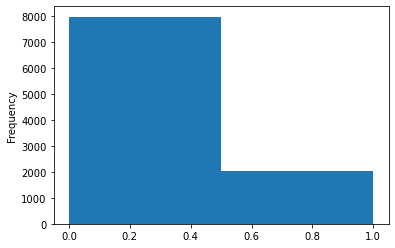

In [20]:
y.plot(kind = 'hist', bins = 2)

In [21]:
def score(y_valid,y_pred):
    print('Полнота', recall_score(y_valid, y_pred))
    print('Точность', precision_score(y_valid, y_pred))
    print('F1', f1_score(y_valid, y_pred))

In [22]:
def model(x_train, y_train, x_valid, y_valid):
    model_DT = DecisionTreeClassifier(random_state=12345)
    model_DT.fit(x_train, y_train)
    DT = pd.Series(model_DT.predict(x_valid)).value_counts(normalize=1)
    
    model_RF = RandomForestClassifier(random_state=12345)
    model_RF.fit(x_train, y_train)
    RF = pd.Series(model_RF.predict(x_valid)).value_counts(normalize=1)

    model_LG = LogisticRegression(solver='liblinear',random_state=12345)
    model_LG.fit(x_train, y_train)
    LG = pd.Series(model_LG.predict(x_valid)).value_counts(normalize=1)
    
    print('Доли ответов для дерева решений')
    print(DT)
    print('Доли ответов для случайного леса')
    print(RF)
    print('Доли ответов для логистической регрессии')
    print(LG)

In [23]:
model(x_train, y_train, x_valid, y_valid)

Доли ответов для дерева решений
0    0.797
1    0.203
dtype: float64
Доли ответов для случайного леса
0    0.8765
1    0.1235
dtype: float64
Доли ответов для логистической регрессии
0    0.9705
1    0.0295
dtype: float64


In [24]:
model_RF = RandomForestClassifier(max_depth = 15, n_estimators = 45, random_state=12345)
model_RF.fit(x_train, y_train)
y_RF = model_RF.predict(x_valid)
confusion_matrix(y_valid, y_RF)

array([[1546,   36],
       [ 239,  179]], dtype=int64)

In [25]:
score(y_valid, y_RF)

Полнота 0.42822966507177035
Точность 0.8325581395348837
F1 0.5655608214849921


In [26]:
probabilities_valid = model_RF.predict_proba(x_valid)
probabilities_one_valid = probabilities_valid[:, 1]

In [27]:
roc = model_RF.predict_proba(x_valid)[:,1]
auc_roc = roc_auc_score(y_valid, roc)
auc_roc

0.8517850337831708

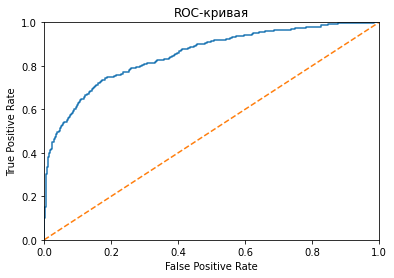

In [28]:
fpr, tpr, thresholds = roc_curve(y_valid, probabilities_one_valid) 
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

In [29]:
def upsample(x,y,repeat):
    x_zeros = x[y==0]
    x_ones = x[y==1]
    y_zeros = y[y==0]
    y_ones = y[y==1]
    
    x_upsampled = pd.concat([x_zeros] + [x_ones]*repeat)
    y_upsampled = pd.concat([y_zeros] + [y_ones]*repeat)
    x_upsampled, y_upsampled  = shuffle(x_upsampled, y_upsampled, random_state=12345)
    
    return x_upsampled, y_upsampled

In [30]:
x_upsampled, y_upsampled = upsample(x_train,y_train,4)

In [31]:
y_upsampled.value_counts(normalize=1)

0    0.501043
1    0.498957
Name: Exited, dtype: float64

In [32]:
model_RF_1 = RandomForestClassifier(max_depth = 15, n_estimators = 35, random_state=12345)
model_RF_1.fit(x_upsampled, y_upsampled)
y_RF_1 = model_RF_1.predict(x_valid)
confusion_matrix(y_valid, y_RF_1)

array([[1452,  130],
       [ 179,  239]], dtype=int64)

In [33]:
score(y_valid, y_RF_1)

Полнота 0.5717703349282297
Точность 0.6476964769647696
F1 0.6073697585768743


In [34]:
def downsample(x,y,fraction):
    x_zeros = x[y==0]
    x_ones = x[y==1]
    y_zeros = y[y==0]
    y_ones = y[y==1]
    
    x_downsample = pd.concat([x_zeros.sample(frac=fraction, random_state=12345)]+[x_ones])
    y_downsample = pd.concat([y_zeros.sample(frac=fraction, random_state=12345)]+[y_ones])
    x_downsample,y_downsample = shuffle(x_downsample,y_downsample,random_state=12345)
    
    return x_downsample,y_downsample

In [35]:
x_downsample,y_downsample = downsample(x_train,y_train,0.25)

In [36]:
y_downsample.value_counts(normalize=1)

0    0.501043
1    0.498957
Name: Exited, dtype: float64

In [37]:
model_RF = RandomForestClassifier(max_depth = 15, n_estimators = 30, random_state=12345)
model_RF.fit(x_downsample,y_downsample)
y_RF = model_RF.predict(x_valid)
confusion_matrix(y_valid, y_RF)

array([[1240,  342],
       [ 110,  308]], dtype=int64)

In [38]:
score(y_valid, y_RF)

Полнота 0.7368421052631579
Точность 0.47384615384615386
F1 0.5767790262172284


Было рассмотрено три модели для решения задачи: решающее дерево, случайный лес, логистическая регрессия. Для дальнейшего использования я оставила модель случайного леса, так как эта модель лучше себя показала при тестировании. Далее были подобраны оптимальные гиперпараметры. И были рассмотрены два метода борьбы с дисбалансом классов. Метод увеличения выборки проявил себя лучше. Поэтому мы оставили его. Тестирование происходило модели случайного леса с подобранными гиперпараметрами и метода увеличения выборки для борьбы с дисбалансом классов. В результате мы добились нужного нам результата - F1 > 0.59

## Тестирование модели

In [39]:
y_pred = model_RF_1.predict(x_test)
score(y_test, y_pred)

Полнота 0.541371158392435
Точность 0.6205962059620597
F1 0.5782828282828283


In [40]:
probabilities_test = model_RF.predict_proba(x_test)
probabilities_one_test = probabilities_test[:, 1]

In [41]:
roc = model_RF_1.predict_proba(x_test)[:,1]
auc_roc = roc_auc_score(y_test, roc)
auc_roc

0.8374783193992844

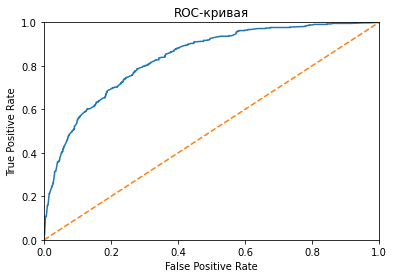

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_test) 
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*